In [1]:
!pip install featuretools --upgrade

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
url = 'https://raw.githubusercontent.com/NevilleTeh/WIE3007_DMW/refs/heads/main/dataset/Data%20Science%20Salary%202021%20to%202023.csv'
import featuretools as ft

# **Load Dataset**

In [2]:
df = pd.read_csv(url)

In [3]:
# Display the first few rows of the dataset
styled_df = df.head(5).style.set_properties(**{'background-color': '#e793ff ' ,'color':'black','border-color': '#8b8c8c'})
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


**Data Information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


**Statistics**

In [5]:
df.describe()

,work_year,salary,salary_in_usd
count,3761.000000,3.761000e+03,3761.000000
mean,2022.374103,1.905999e+05,137555.178942
std,0.691252,6.711457e+05,63022.267974
min,2020.000000,6.000000e+03,5132.000000
25%,2022.000000,1.000000e+05,95000.000000
50%,2022.000000,1.375000e+05,135000.000000
75%,2023.000000,1.800000e+05,175000.000000
max,2023.000000,3.040000e+07,450000.000000


**Check Columns**

In [6]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'company_location',
       'company_size'],
      dtype='object')

**Check Missing Values**

In [7]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
company_location,0
company_size,0


**Standardizing Data Formats**

In [8]:
#  Replace values in experience-level column
df['experience_level'] = df['experience_level'].replace('EN', 'Entry-Level')
df['experience_level'] = df['experience_level'].replace('EX', 'Experienced')
df['experience_level'] = df['experience_level'].replace('MI', 'Mid-Level')
df['experience_level'] = df['experience_level'].replace('SE', 'Senior')

In [9]:
#Replace values in employment_type column
df['employment_type'] = df['employment_type'].replace('FT', 'Full-Time')
df['employment_type'] = df['employment_type'].replace('CT', 'Contractor')
df['employment_type'] = df['employment_type'].replace('FL', 'Freelancer')
df['employment_type'] = df['employment_type'].replace('PT', 'Part-Time')

In [10]:
#Replace values in Company size column
df['company_size'] = df['company_size'].replace('L', "Large")
df['company_size'] = df['company_size'].replace('M', "Medium")
df['company_size'] = df['company_size'].replace('S', "Small")

In [11]:
#show the dataset top row result
styled_df = df.head(5).style.set_properties(**{'background-color': '#e793ff ' ,'color':'black','border-color': '#8b8c8c'})
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,Entry-Level,Full-Time,Applied Scientist,213660,USD,213660,US,Large
1,2023,Entry-Level,Full-Time,Applied Scientist,130760,USD,130760,US,Large
2,2023,Entry-Level,Full-Time,Data Quality Analyst,100000,USD,100000,NG,Large
3,2023,Entry-Level,Full-Time,Compliance Data Analyst,30000,USD,30000,NG,Large
4,2023,Entry-Level,Full-Time,Applied Scientist,204620,USD,204620,US,Large


**Validation of Data Consistency After Data Standardisation**

In [12]:
def check_data_consistency(df, columns):
    for column in columns:
        print(f"Unique values in '{column}':\n", df[column].unique())
        print('-' * 50)

columns_to_check = ['experience_level', 'employment_type', 'company_size']

check_data_consistency(df, columns_to_check)


Unique values in 'experience_level':
 ['Entry-Level' 'Experienced' 'Mid-Level' 'Senior']
--------------------------------------------------
Unique values in 'employment_type':
 ['Full-Time' 'Part-Time' 'Contractor' 'Freelancer']
--------------------------------------------------
Unique values in 'company_size':
 ['Large' 'Medium' 'Small']
--------------------------------------------------


**Handling outliers**

Outliers detected:
      work_year experience_level employment_type  \
893        2023           Senior       Full-Time   
2008       2022        Mid-Level       Full-Time   
3449       2022           Senior       Full-Time   
3519       2021      Experienced      Contractor   
3609       2021        Mid-Level       Full-Time   
3714       2020        Mid-Level       Full-Time   
3760       2020           Senior       Full-Time   

                               job_title   salary salary_currency  \
893                         AI Scientist  1500000             ILS   
2008                        Data Analyst   350000             GBP   
3449                 Data Analytics Lead   405000             USD   
3519            Principal Data Scientist   416000             USD   
3609  Applied Machine Learning Scientist   423000             USD   
3714                  Research Scientist   450000             USD   
3760                      Data Scientist   412000             USD   

      salar

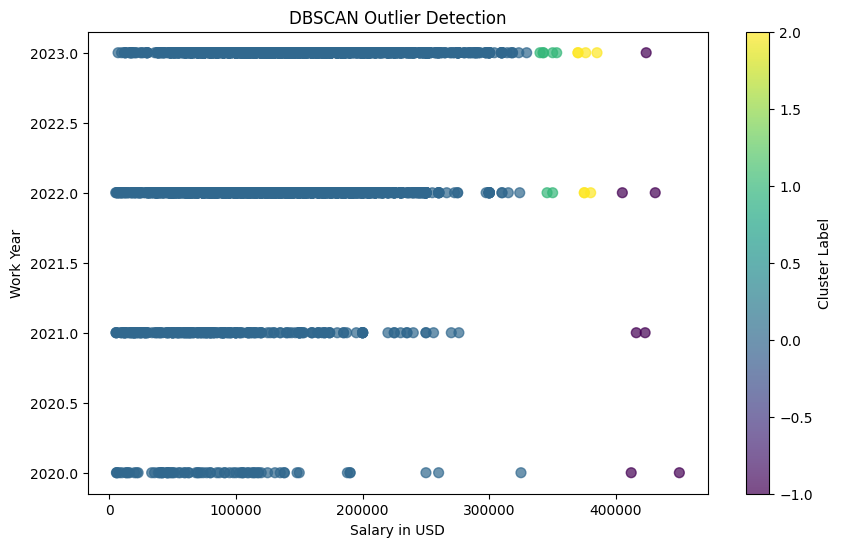

In [13]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

X = df[['salary_in_usd', 'work_year']].values

db = DBSCAN(eps=10000, min_samples=5).fit(X)

df['cluster'] = db.labels_

outliers = df[df['cluster'] == -1]

print("Outliers detected:")
print(outliers)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Salary in USD')
plt.ylabel('Work Year')
plt.title('DBSCAN Outlier Detection')
plt.colorbar(label='Cluster Label')
plt.show()


In [14]:
# Remove outliers (keep only rows where cluster is not -1)
df_cleaned = df[df['cluster'] != -1]

# Drop the 'cluster' column if no longer needed
df_cleaned = df_cleaned.drop(columns=['cluster'])

print(f"Dataset size after removing outliers: {df_cleaned.shape}")


Dataset size after removing outliers: (3754, 9)


In [15]:
import numpy as np

# Backup original column for comparison
df['salary_in_usd_original'] = df['salary_in_usd']

# Calculate IQR for 'salary_in_usd'
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")

# Cap outliers in 'salary_in_usd'
df['salary_in_usd'] = np.where(
    df['salary_in_usd'] < lower_bound, lower_bound,
    np.where(df['salary_in_usd'] > upper_bound, upper_bound, df['salary_in_usd'])
)

# Compare before and after capping
print("Statistics before capping outliers:")
print(df['salary_in_usd_original'].describe())

print("\nStatistics after capping outliers:")
print(df['salary_in_usd'].describe())

# Display the rows where capping was applied
capped_rows = df[(df['salary_in_usd_original'] < lower_bound) | (df['salary_in_usd_original'] > upper_bound)]
print("\nRows where outliers were capped:")
print(capped_rows[['salary_in_usd_original', 'salary_in_usd']])



Lower Bound for Outliers: -25000.0
Upper Bound for Outliers: 295000.0
Statistics before capping outliers:
count      3761.000000
mean     137555.178942
std       63022.267974
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd_original, dtype: float64

Statistics after capping outliers:
count      3761.000000
mean     136945.542941
std       61066.722909
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      295000.000000
Name: salary_in_usd, dtype: float64

Rows where outliers were capped:
      salary_in_usd_original  salary_in_usd
122                   329500       295000.0
136                   353200       295000.0
150                   310000       295000.0
152                   310000       295000.0
156                   310000       295000.0
...                      ...            ...
3519                  416000       295000.0
3609                  4

In [16]:
# Calculate statistics for the numeric columns
salary_stats = df['salary_in_usd'].describe()

In [17]:
# Calculate IQR, upper limit, and lower limit for each numeric column
IQR = salary_stats['75%'] - salary_stats['25%']
upper_limit = salary_stats['75%'] + 1.5 * IQR
lower_limit = salary_stats['25%'] - 1.5 * IQR

In [18]:
# Create a DataFrame to display the statistics with no decimal places
stats_df = pd.DataFrame({
    'Statistic': ['Min', 'Q1 (25%)', 'Median (50%)', 'Q3 (75%)', 'Max', 'Mean', 'IQR', 'Upper Limit', 'Lower Limit'],
    'Value': [int(salary_stats['min']), int(salary_stats['25%']), int(salary_stats['50%']), int(salary_stats['75%']), int(salary_stats['max']), int(salary_stats['mean']), int(IQR), int(upper_limit), int(lower_limit)]
})

from tabulate import tabulate
# Display the statistics in a proper table
print(tabulate(stats_df, headers='keys', tablefmt='grid', showindex=False))

+--------------+---------+
| Statistic    |   Value |
+==============+=========+
| Min          |    5132 |
+--------------+---------+
| Q1 (25%)     |   95000 |
+--------------+---------+
| Median (50%) |  135000 |
+--------------+---------+
| Q3 (75%)     |  175000 |
+--------------+---------+
| Max          |  295000 |
+--------------+---------+
| Mean         |  136945 |
+--------------+---------+
| IQR          |   80000 |
+--------------+---------+
| Upper Limit  |  295000 |
+--------------+---------+
| Lower Limit  |  -25000 |
+--------------+---------+


In [20]:
# Visualize outliers using boxplots for numeric columns
#plt.figure(figsize=(10, 6))
#sns.boxplot(y=df['salary_in_usd'])
#plt.title('Boxplot of Salary in USD')
#plt.ylabel('Salary in USD')
#plt.ylim(0, df['salary_in_usd'].max() + 10000)  # Set y-axis limit for consistency
#plt.show()

**One-Hot Encoding**

In [19]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['experience_level', 'employment_type', 'company_size'])

**Feature Engineering**

In [20]:
# Use Featuretools for automated feature engineering
es = ft.EntitySet(id="salary_data")
es = es.add_dataframe(dataframe_name="salaries", dataframe=df_encoded, index="index")

In [21]:
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name="salaries")

In [22]:
# Display the feature matrix
display(feature_matrix.head())

,work_year,job_title,salary,salary_currency,salary_in_usd,company_location,cluster,salary_in_usd_original,experience_level_Entry-Level,experience_level_Experienced,experience_level_Mid-Level,experience_level_Senior,employment_type_Contractor,employment_type_Freelancer,employment_type_Full-Time,employment_type_Part-Time,company_size_Large,company_size_Medium,company_size_Small
index,,,,,,,,,,,,,,,,,,,
0,2023,Applied Scientist,213660,USD,213660.0,US,0,213660,True,False,False,False,False,False,True,False,True,False,False
1,2023,Applied Scientist,130760,USD,130760.0,US,0,130760,True,False,False,False,False,False,True,False,True,False,False
2,2023,Data Quality Analyst,100000,USD,100000.0,NG,0,100000,True,False,False,False,False,False,True,False,True,False,False
3,2023,Compliance Data Analyst,30000,USD,30000.0,NG,0,30000,True,False,False,False,False,False,True,False,True,False,False
4,2023,Applied Scientist,204620,USD,204620.0,US,0,204620,True,False,False,False,False,False,True,False,True,False,False


# **DS Salary Trends (2020-2023)**

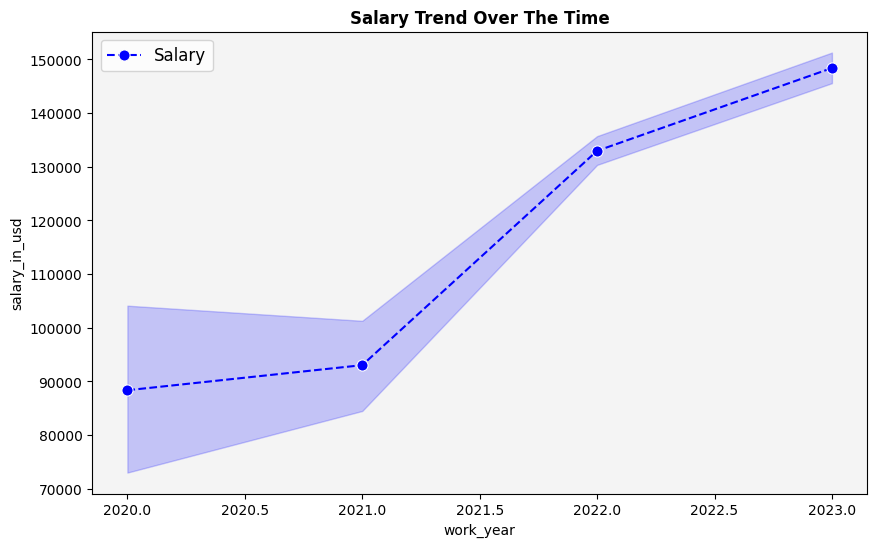

In [25]:
plt.figure(figsize = (10,6))
salary_trend = df[['salary_in_usd', 'work_year']].sort_values(by = 'work_year')
p = sns.lineplot(data =salary_trend ,x = 'work_year', y = 'salary_in_usd', marker = 'o',linestyle='--', color='Blue', markersize=8 )
plt.title('Salary Trend Over The Time', fontsize=12, fontweight='bold')

# Customize the background color
p.set_facecolor("#f4f4f4")
plt.legend(['Salary'], loc='best', fontsize=12)

# Remove the grid lines
p.grid(False)

plt.show()

Insights:
- There wasn't much change in salary from 2020 to 2021
- Continual changes occurred in salary from 2021-2022
- The progress in salary from 2022 to 2023 followed a similar pattern

**Salary Trend Over Time by Company Size**

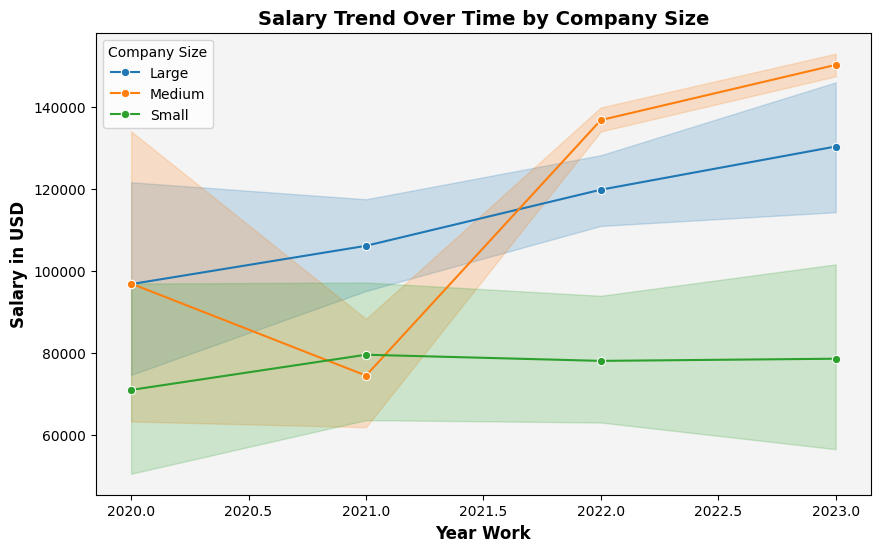

In [26]:
plt.figure(figsize=(10, 6))
p = sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', marker='o')

plt.xlabel('Year Work', fontsize=12, fontweight='bold')
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold')

# Add a legend
plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper left')

# Add a title
plt.title('Salary Trend Over Time by Company Size', fontsize=14, fontweight='bold')


# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()

Insight:
- The salary trend in medium-sized companies is increasing compared to small and large companies.
- The salary line in large companies is not fluctuating as much as in medium-sized companies.

**Average Salary by Experience Level**

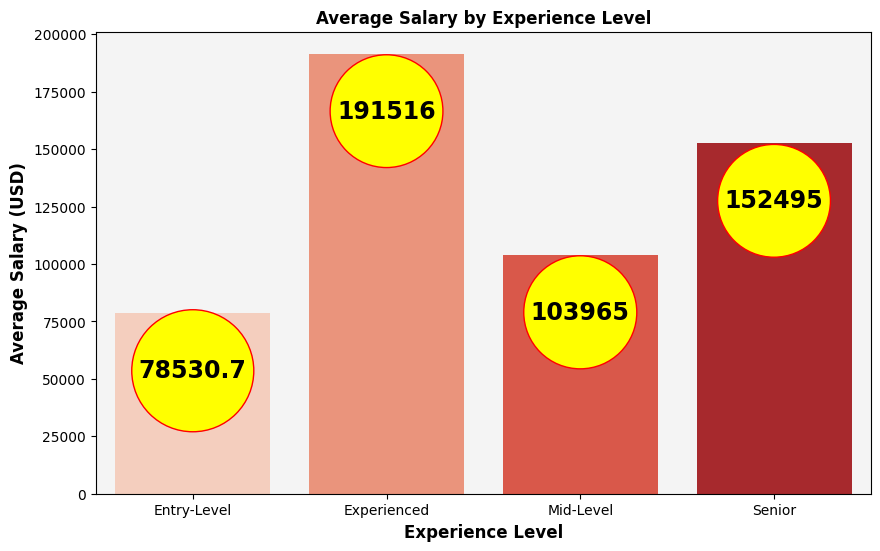

In [27]:
exp_salary = df.groupby('experience_level')['salary_in_usd'].mean()
plt.figure(figsize = (10,6))
ax = sns.barplot(x = exp_salary.index, y = exp_salary.values, palette = 'Reds')
plt.title('Average Salary by Experience Level', fontsize=12, fontweight='bold')
plt.xlabel('Experience Level', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container,
                padding = -50,
                fontsize = 17,
                bbox = {'boxstyle': 'circle', 'edgecolor': 'red', 'facecolor': 'yellow'},
                label_type="edge",
                fontweight = 'bold'


                )

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

plt.show()

Insights:
- Experienced professionals earn the highest salary at approximately 194,931 USD.
- Seniors also receive a competitive average salary of about 153,062 USD.
- Mid-level employees have an average salary of around 104,545 USD.
- Entry-level positions offer a lower average salary, at approximately 78,546 USD.

**Average Salary by Employment Type**

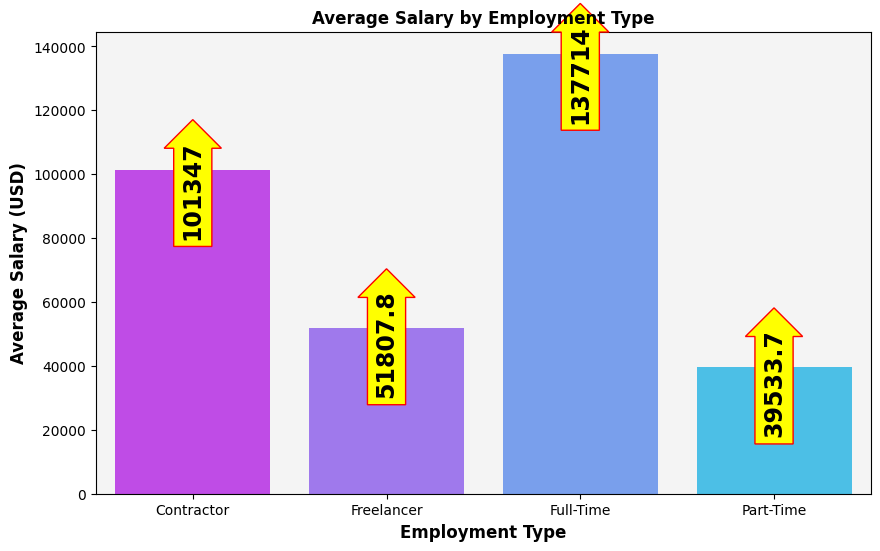

In [28]:
#Group data by 'employment_type' and calculate the average salary for each type
emp_salary = df.groupby('employment_type')['salary_in_usd'].mean()

plt.figure(figsize = (10,6))
p = sns.barplot(y = emp_salary.values, x = emp_salary.index, palette = 'cool_r')
plt.title('Average Salary by Employment Type', fontsize=12, fontweight='bold')
plt.xlabel('Employment Type', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

for container in p.containers:
    plt.bar_label(container,
                padding = -50,
                fontsize = 17,
                bbox = {'boxstyle': 'rarrow', 'edgecolor': 'red', 'facecolor': 'yellow'},
                label_type="edge",
                fontweight = 'bold',
                rotation = 90

                 )

# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)

plt.show()

Insights:
- Full-time employees have the highest average salary at approximately 138,298 USD.
- Contractors also earn a competitive average salary of about 113,447 USD.
- Freelancers and Part-time workers have lower average salaries, at around 51,808 USD and 39,534 USD.


**Average Salary by Job Title (TOP 10)**

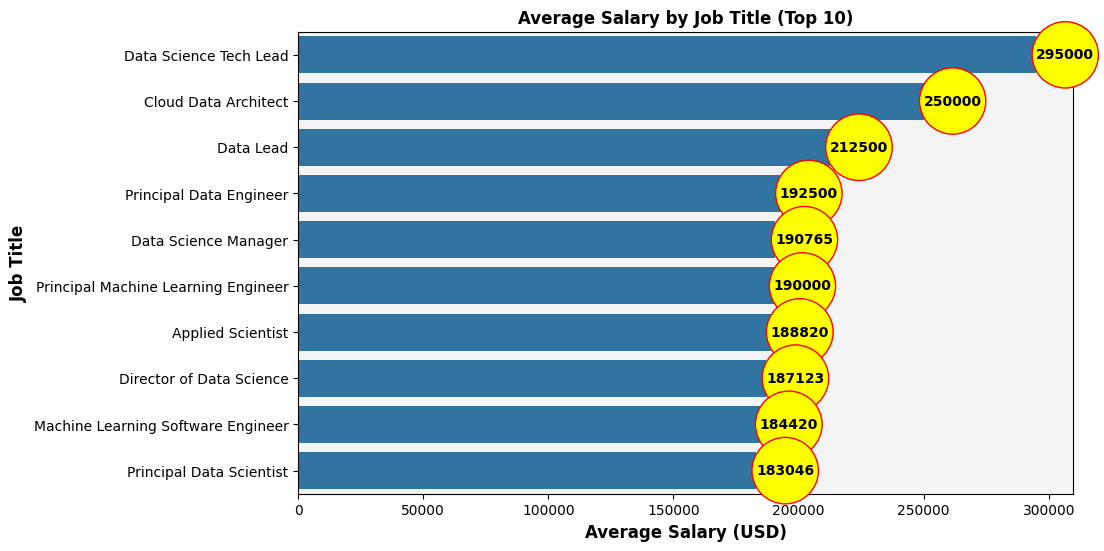

In [29]:
# Group data by 'job_title' and calculate the average salary for each title
job_title_salary= df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending = False)

plt.figure(figsize = (10,6))
p = sns.barplot(x= job_title_salary.values[:10], y = job_title_salary.index[:10])

plt.title('Average Salary by Job Title (Top 10)', fontsize=12, fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,

                bbox = {'boxstyle': 'circle', 'facecolor': 'yellow', 'edgecolor': 'red'},
                fontweight = 'bold'


               )
# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()

Insights:
- Data Science Tech Lead has the highest average salary at 375,000 USD.
- Cloud Data Architect and Data Lead also have notably high salaries.
- The top 10 job titles exhibit strong earning potential in the data science field.

**Average Salary by Currency**

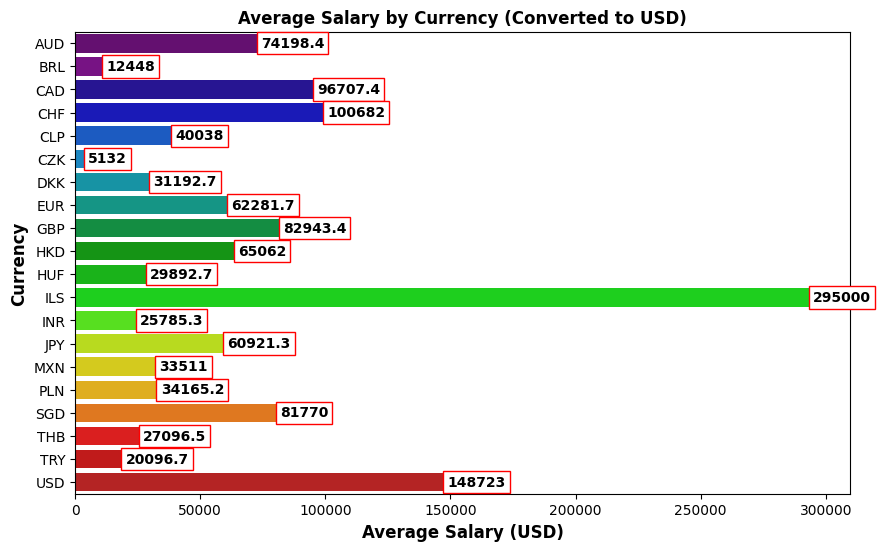

In [30]:
# Group data by 'salary_currency' and calculate the average salary in USD for each currency
currency_salary  = df.groupby('salary_currency')['salary_in_usd'].mean()

plt.figure(figsize = (10,6))
p = sns.barplot(x = currency_salary.values , y  = currency_salary.index, palette = 'nipy_spectral')
plt.title('Average Salary by Currency (Converted to USD)', fontsize=12, fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Currency', fontsize=12, fontweight='bold')


for container in p.containers:
    p.bar_label(container,
                bbox = {'boxstyle': 'square', 'facecolor': 'white', 'edgecolor': 'red'},
                fontweight = 'bold'


               )
# Customize the background color
plt.show()

Insights:
- Employees receiving salaries in USD have the highest average salary at approximately 149,351 USD.
- Salaries in ILS (Israeli Shekel) are notably high, with an average of 423,834 USD.
- GBP (British Pound) and CHF (Swiss Franc) also offer competitive average salaries.
- Other currencies vary in average salaries, with AUD (Australian Dollar) and BRL (Brazilian Real) being among the lowest.

**Average Data Science Salaries by Location**

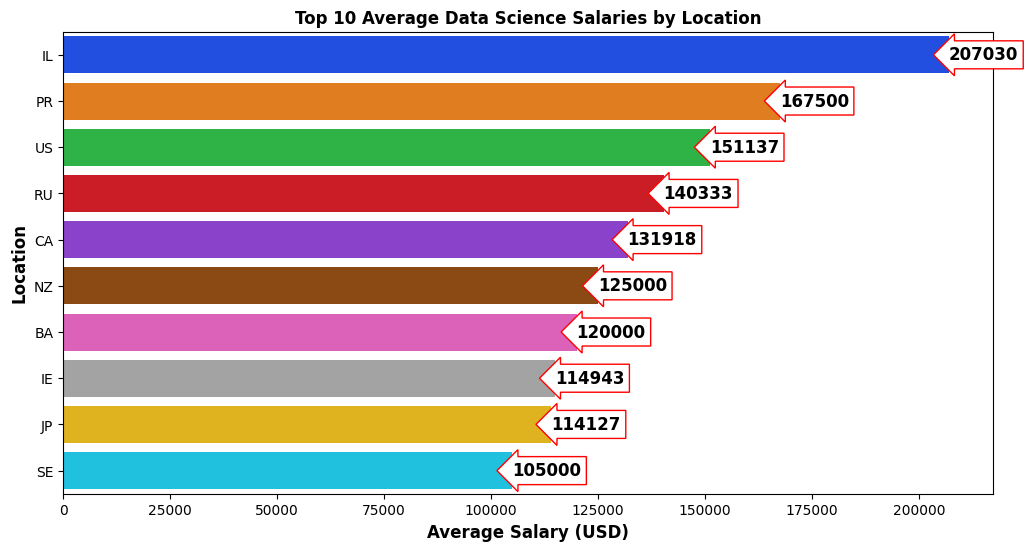

In [31]:
# Group the data by company_location and calculate the mean salary for each location
average_salaries_by_location = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Sort the locations by average salary in descending order
average_salaries_by_location = average_salaries_by_location.sort_values(by='salary_in_usd', ascending=False)

# Select the top N locations to plot
top_n_locations = 10  # You can change this number as needed

# Create a bar chart to visualize average salaries by country
plt.figure(figsize=(12, 6))
p = sns.barplot(x='salary_in_usd', y='company_location', data=average_salaries_by_location.head(top_n_locations), palette = 'bright')
plt.title('Top {} Average Data Science Salaries by Location'.format(top_n_locations), fontsize=12, fontweight='bold' )
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Location', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,
                fontsize = 12,
                bbox = {'boxstyle': 'larrow', 'edgecolor': 'red', 'facecolor': 'white'},
                label_type="edge",
                fontweight = 'bold'
               )

# Customize the background color
ax.set_facecolor("#f4f4f4")
plt.show()

Insights:
- In Illinois (IL), the average data science salary is notably high, at approximately 271,447 USD.
- Puerto Rico (PR) and the United States (US) also offer competitive average salaries, with approximately 167,500 USD and 151,801 USD, respectively.
- Russia (RU) and Canada (CA) have average data science salaries of around 140,333 USD and 131,918 USD, respectively.
- New Zealand (NZ), Bosnia and Herzegovina (BA), Ireland (IE), Japan (JP), and Sweden (SE) round out the top locations with varying average salaries.

**Average Salary by Company Size**

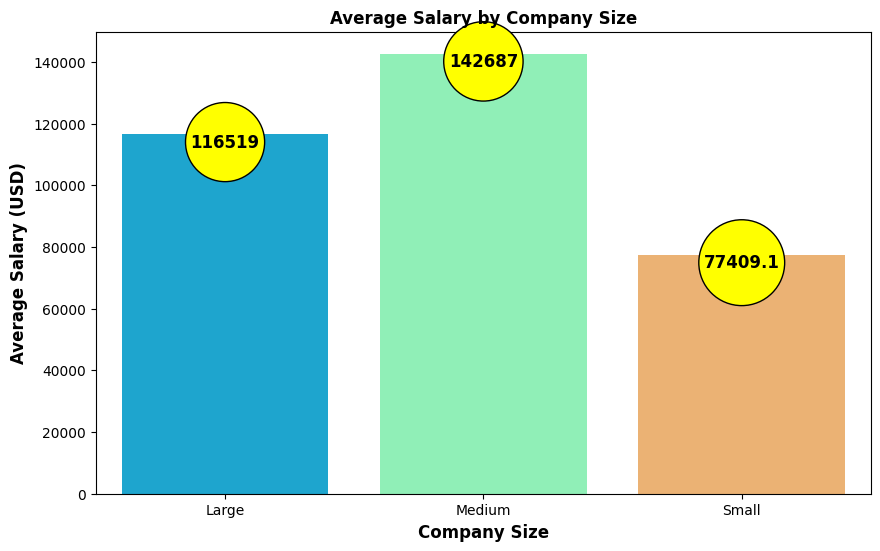

In [32]:
# Group data by 'company_size' and calculate the average salary for each size
company_size_salary = df.groupby('company_size')['salary_in_usd'].mean()

# Plot the average salary by company size
plt.figure(figsize=(10, 6))
p = sns.barplot(x=company_size_salary.index, y=company_size_salary.values, palette = 'rainbow')
plt.title('Average Salary by Company Size', fontsize=12, fontweight='bold')
plt.xlabel('Company Size',fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')


for container in p.containers:
    p.bar_label(container, fontweight = 'bold',
                padding = -12,
                fontsize=12,
                bbox = {'boxstyle': 'circle', 'facecolor': 'yellow', 'edgecolor': 'black'}

               )


plt.show()

Insights:
- Medium-sized companies offer the highest average salary at approximately 143,117 USD.
- Large companies follow with an average of about 118,306 USD.
- Small companies offer a lower average salary of around 78,227 USD.

**Salary Distribution for Data Science Professionals**

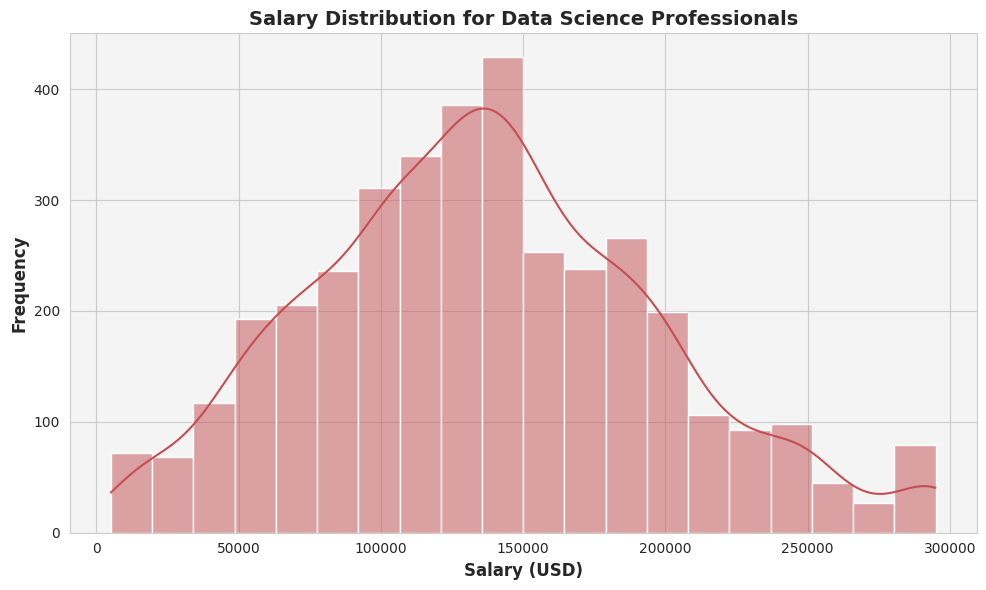

In [33]:
# Set a custom style
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(df['salary_in_usd'], kde=True, color='#c44e52', bins=20, ax=ax)

# Customize labels and title
ax.set_title('Salary Distribution for Data Science Professionals', fontsize=14, fontweight='bold')
ax.set_xlabel('Salary (USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')

# Remove y-axis ticks
ax.tick_params(axis='y', which='both', left=False)

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Show the plot
plt.tight_layout()
plt.show()

Insights:
- The salary distribution for data science professionals is right-skewed, with a majority of professionals earning lower to mid-range salaries.
- A noticeable peak in the distribution suggests a concentration of professionals within a specific salary range.
- The KDE (Kernel Density Estimate) curve provides a smooth estimate of the distribution, showing a prominent peak.

**Job Title Recommendation**

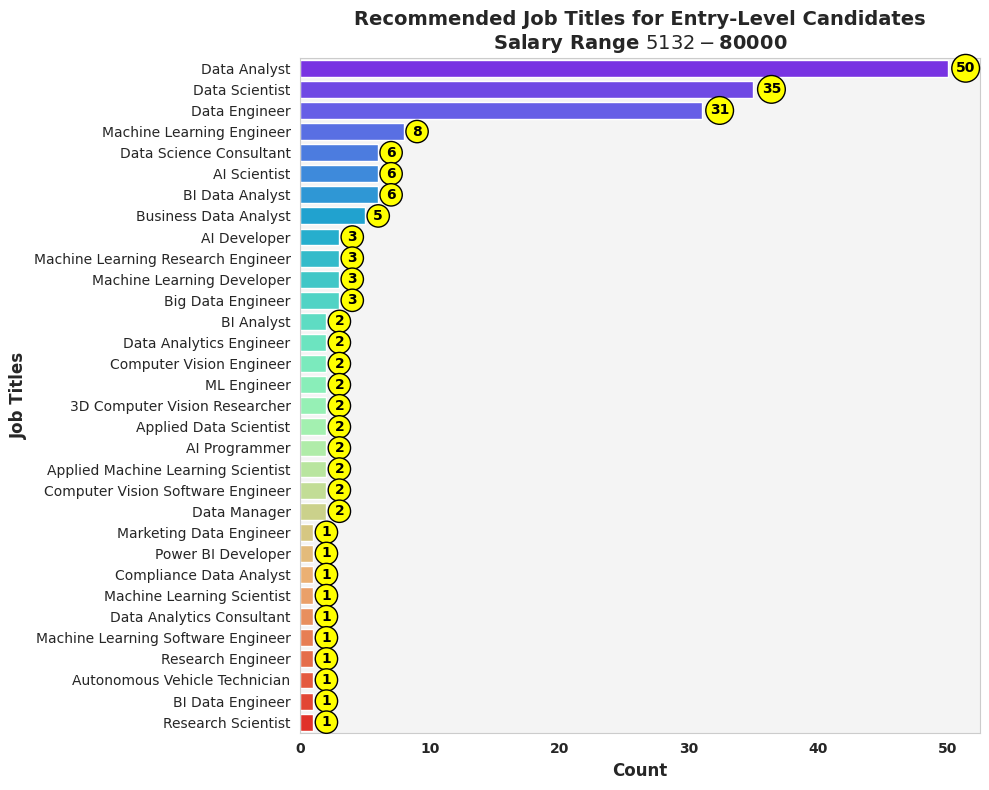

In [34]:
# Define candidate criteria
desired_experience_level = 'Entry-Level'
desired_salary_range = (5132, 80000)  # Replace with the desired salary range in USD

# Filter the dataset based on experience level and desired salary range
filtered_df = df[(df['experience_level'] == desired_experience_level) &
                 (df['salary_in_usd'] >= desired_salary_range[0]) &
                 (df['salary_in_usd'] <= desired_salary_range[1])]

# Count the occurrences of each job title
job_title_counts = filtered_df['job_title'].value_counts().reset_index()
job_title_counts.columns = ['Job Title', 'Count']

# Create a horizontal bar chart using Seaborn with a different color palette
plt.figure(figsize=(10, 8))



ax = sns.barplot(x='Count', y='Job Title', data=job_title_counts, palette = 'rainbow')
plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.ylabel('Job Titles', fontsize=12, fontweight='bold')
plt.title(f'Recommended Job Titles for {desired_experience_level} Candidates\nSalary Range ${desired_salary_range[0]} - ${desired_salary_range[1]}', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, label_type="edge", color="black",
                 padding=6,
                 fontweight='bold',
                 fontsize=10,
                 bbox={'boxstyle': 'circle,pad=0.3', 'facecolor': 'yellow', 'edgecolor': 'black'})

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

# Show the chart
plt.tight_layout()
plt.show()

Insights:
For Entry-Level candidates seeking a salary range between 5,132 to 80,000 USD, the top recommended job titles are:

- Data Analyst (50 job openings)
- Data Scientist (35 job openings)
- Data Engineer (31 job openings)

**Average Salary by Experience Level and Employment Type**

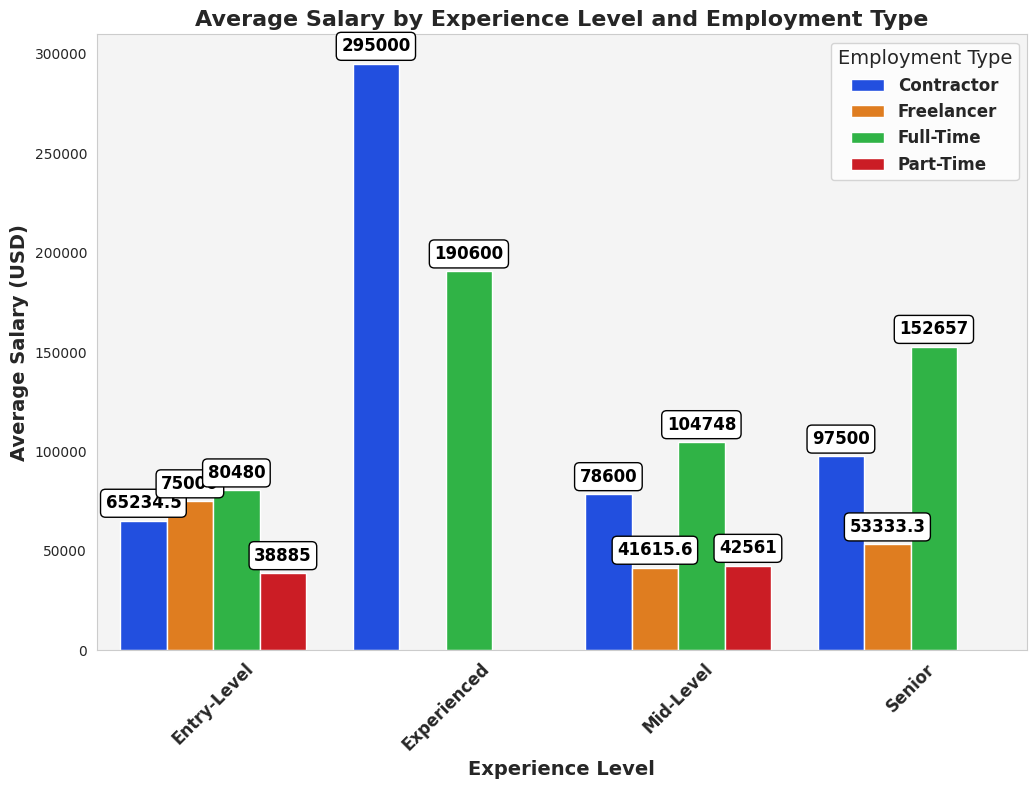

In [35]:
# Calculate average salary for each combination of experience level and employment type
cost_effectiveness = df.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().reset_index()

# Find the combination with the highest average salary (maximum cost-effectiveness)
best_combination = cost_effectiveness.loc[cost_effectiveness['salary_in_usd'].idxmax()]

# Create a bar plot using Seaborn with x and y axes swapped
plt.figure(figsize=(12, 8))

# Use a different color palette for a modern look
sns.set_palette(sns.color_palette('bright'))

ax = sns.barplot(x='experience_level', y='salary_in_usd', hue='employment_type', data=cost_effectiveness)
plt.xlabel('Experience Level', fontsize=14, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=14, fontweight='bold')
plt.title('Average Salary by Experience Level and Employment Type', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, label_type="edge", color="black",
                 padding=6,
                 fontweight='bold',
                 fontsize=12,
                 bbox={'boxstyle': 'round,pad=0.3', 'facecolor': 'white', 'edgecolor': 'black'})

# Increase legend font size and make it bold
legend = plt.legend(title='Employment Type', fontsize=12, title_fontsize=14)
for text in legend.get_texts():
    text.set_fontweight('bold')

# Set the background color to a light gray
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

# Show the plot
plt.show()

Insights:
Best Employment Type and Experience Level for Maximum Cost-Effectiveness:

- Experience Level: Experienced
- Employment Type: Contractor
- Average Salary (USD): 416,000.0

**Average Salary by Company Location and Company Size**

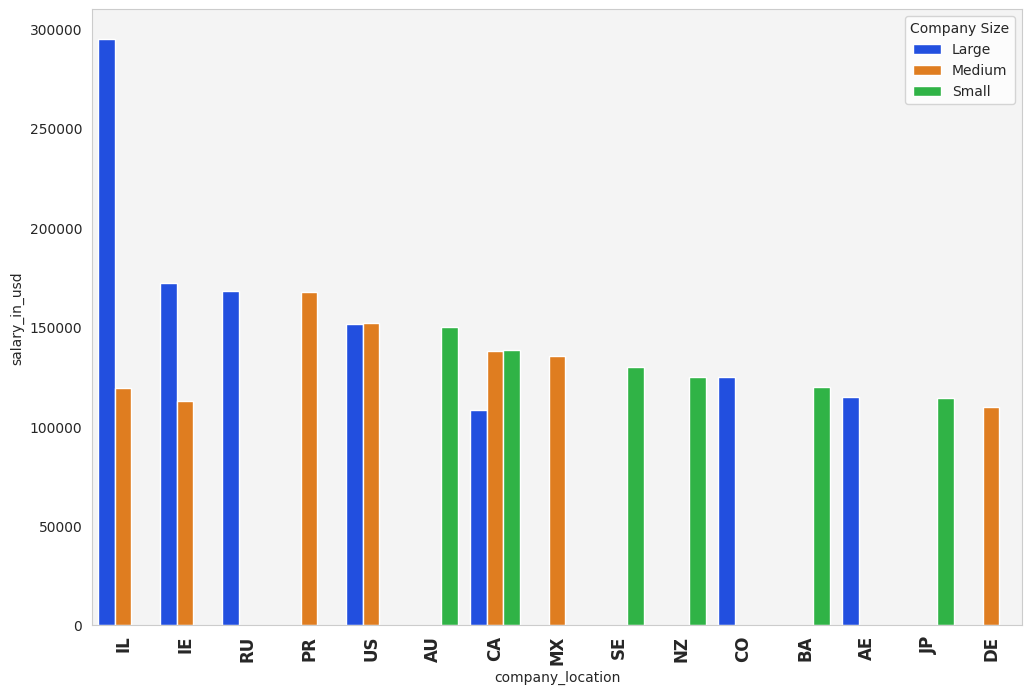

In [36]:
cost_effectiveness = df.groupby(['company_location', 'company_size'])['salary_in_usd'].mean().reset_index().sort_values(by = 'salary_in_usd', ascending = False)[:20]

# Find the combination with the highest average salary (maximum cost-effectiveness)
best_combination = cost_effectiveness.loc[cost_effectiveness['salary_in_usd'].idxmax()]

# Create a bar plot using Seaborn with x and y axes swapped
plt.figure(figsize=(12, 8))

# Use a different color palette for a modern look
sns.set_palette(sns.color_palette('bright'))

ax = sns.barplot(x='company_location', y='salary_in_usd', hue='company_size', data=cost_effectiveness)
plt.xticks(rotation=90, fontsize=12, fontweight='bold')


lg = plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper right')


# Set the background color to a light gray
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

# Show the plot
plt.show()

Insights:
In Illinois (IL), large companies tend to offer an average salary of $423,834 USD, meeting cost-effectiveness criteria.

**Autoviz**

In [41]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


Shape of your Data Set loaded: (3761, 16)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  8
    Number of String-Categorical Columns =  6
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    16 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 1351 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
work_year,int64,0.000000,0,2020.000000,2023.000000,Possible date-time colum: transform before modeling step.
experience_level,object,0.000000,0,,,No issue
employment_type,object,0.000000,0,,,"3 rare categories: ['Part-Time', 'Contractor', 'Freelancer']. Group them into a single category or drop the categories."
job_title,object,0.000000,3,,,81 rare categories: Too many to list. Group them into a single category or drop the categories.
salary,int64,0.000000,33,6000.000000,30400000.000000,Column has 92 outliers greater than upper bound (328132.50) or lower than lower bound(-57287.50). Cap them or remove them.
salary_currency,object,0.000000,0,,,15 rare categories: Too many to list. Group them into a single category or drop the categories.
salary_in_usd,float64,0.000000,NA,5132.000000,295000.000000,No issue
company_location,object,0.000000,2,,,65 rare categories: Too many to list. Group them into a single category or drop the categories.
company_size,object,0.000000,0,,,No issue
cluster,int64,0.000000,0,-1.000000,2.000000,Column has 21 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.


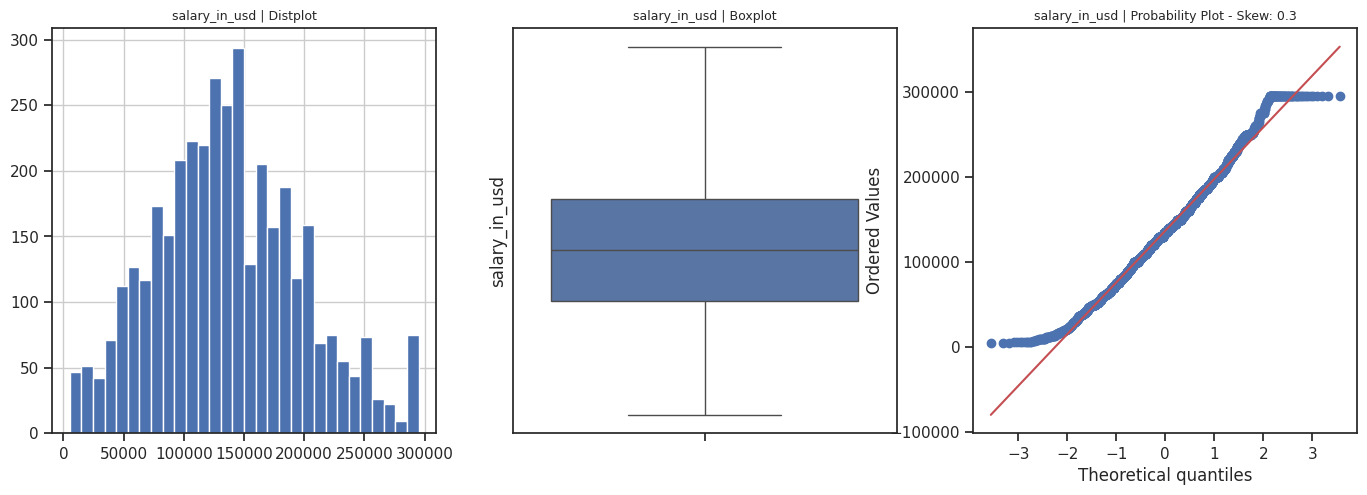

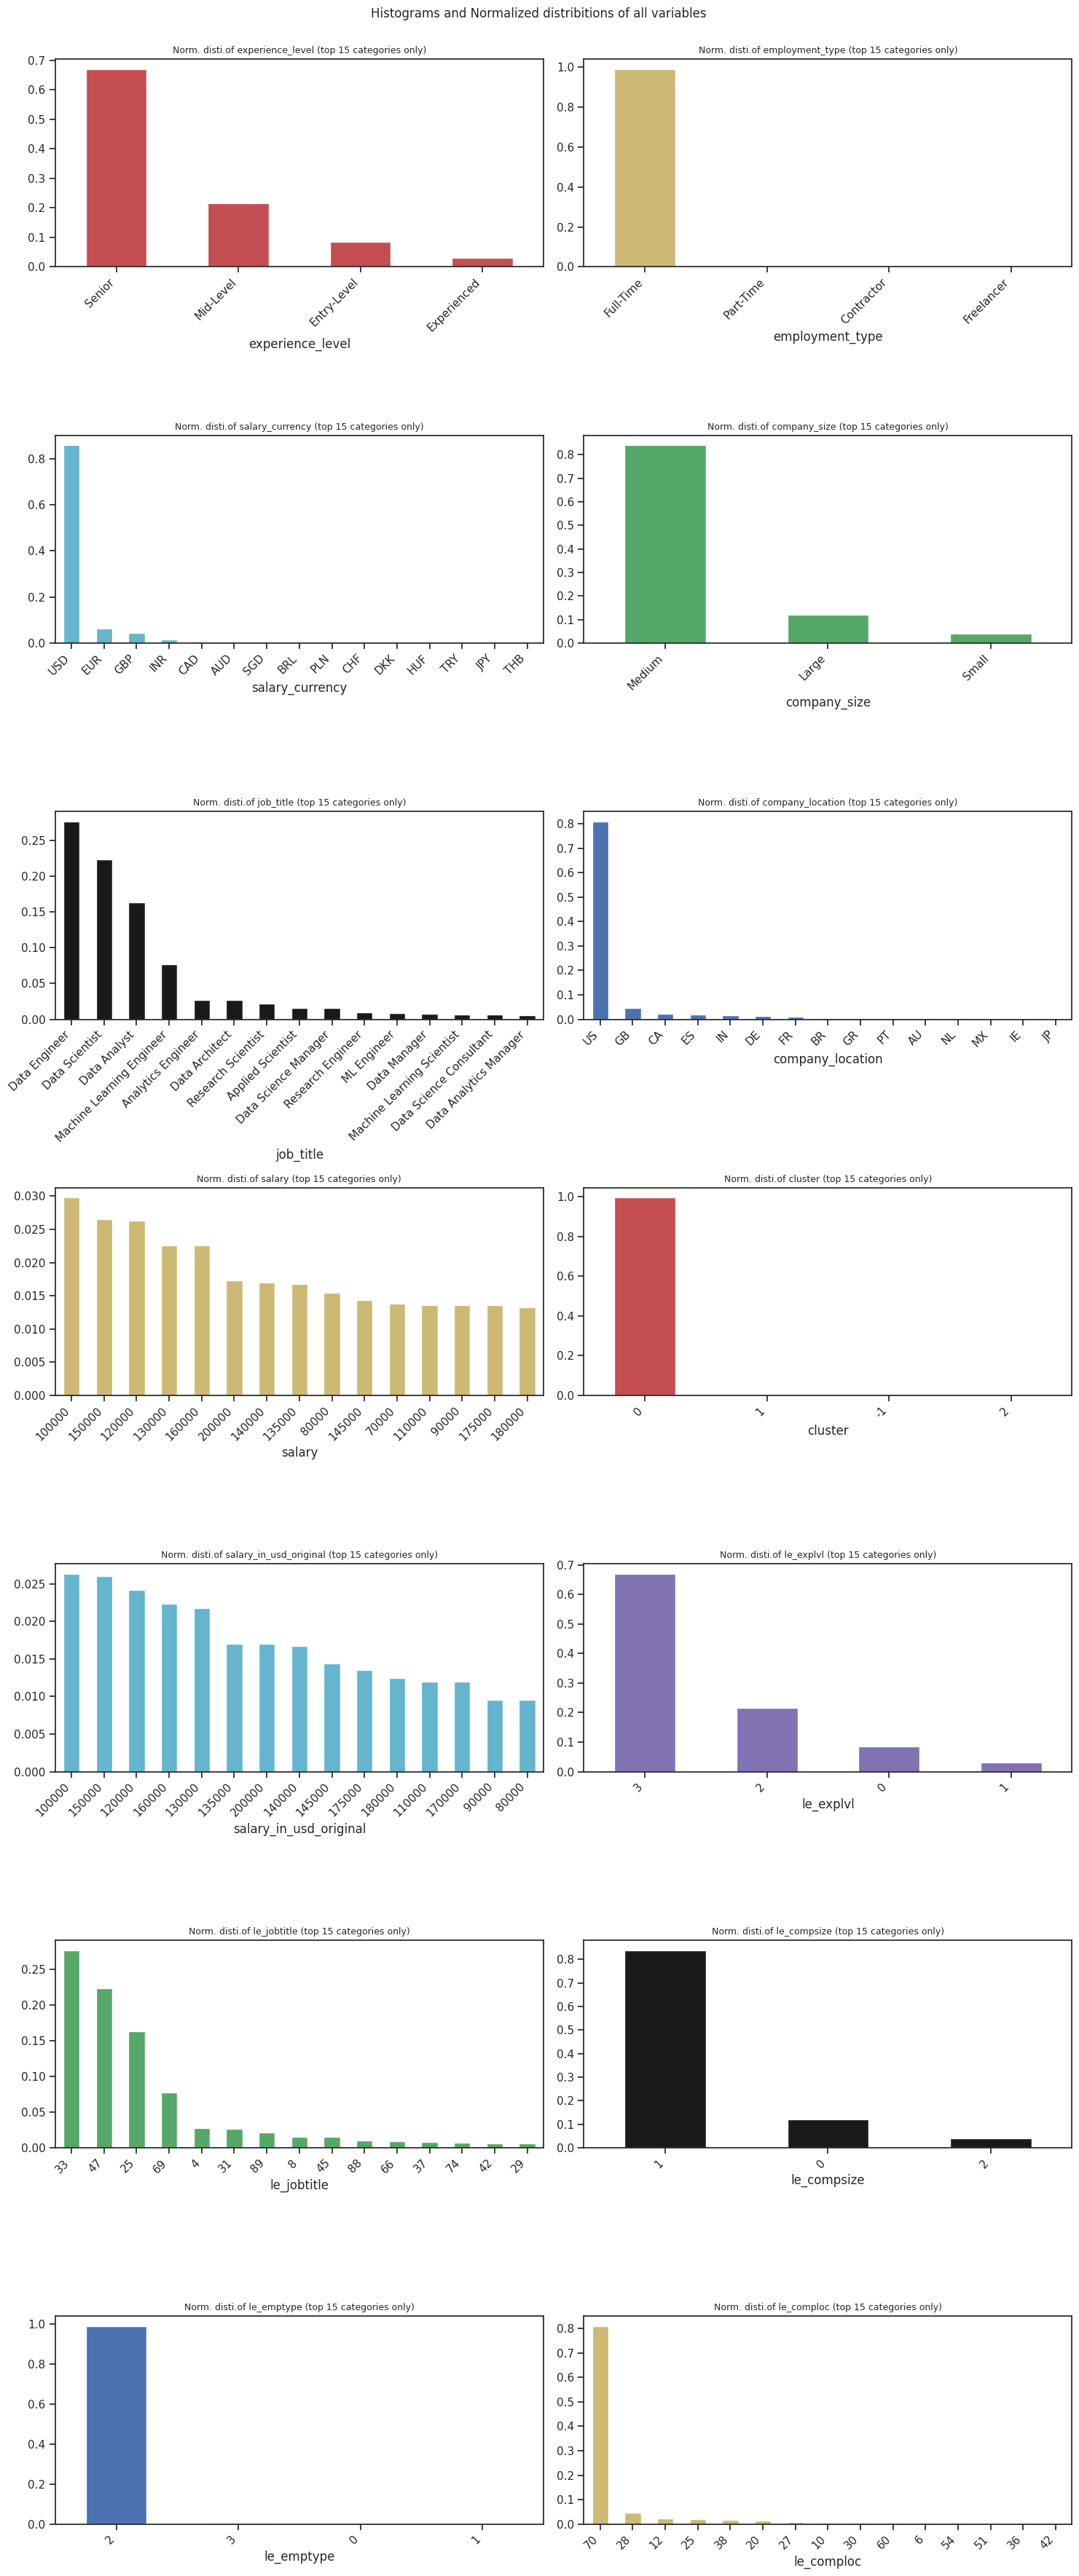

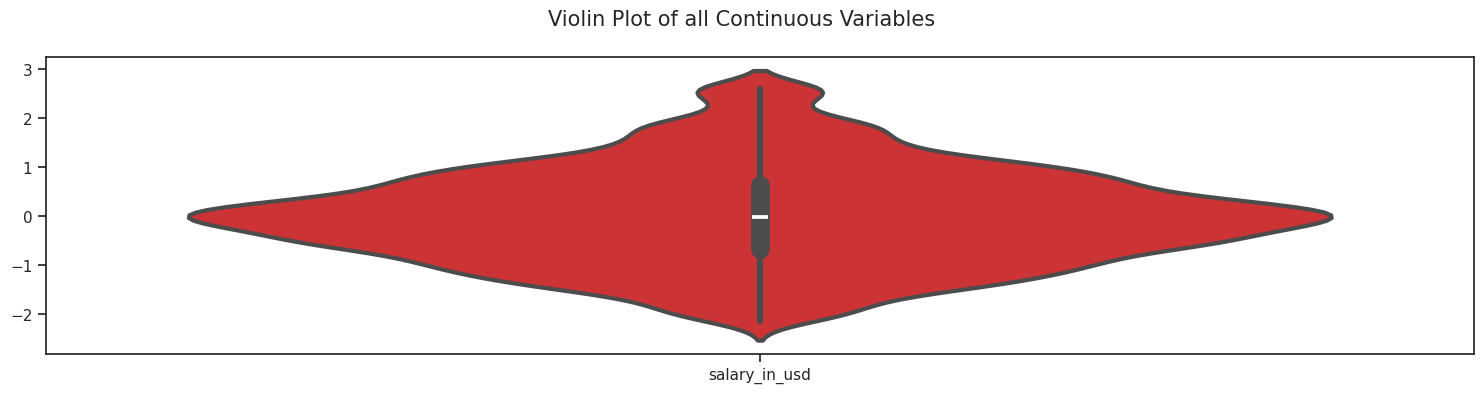

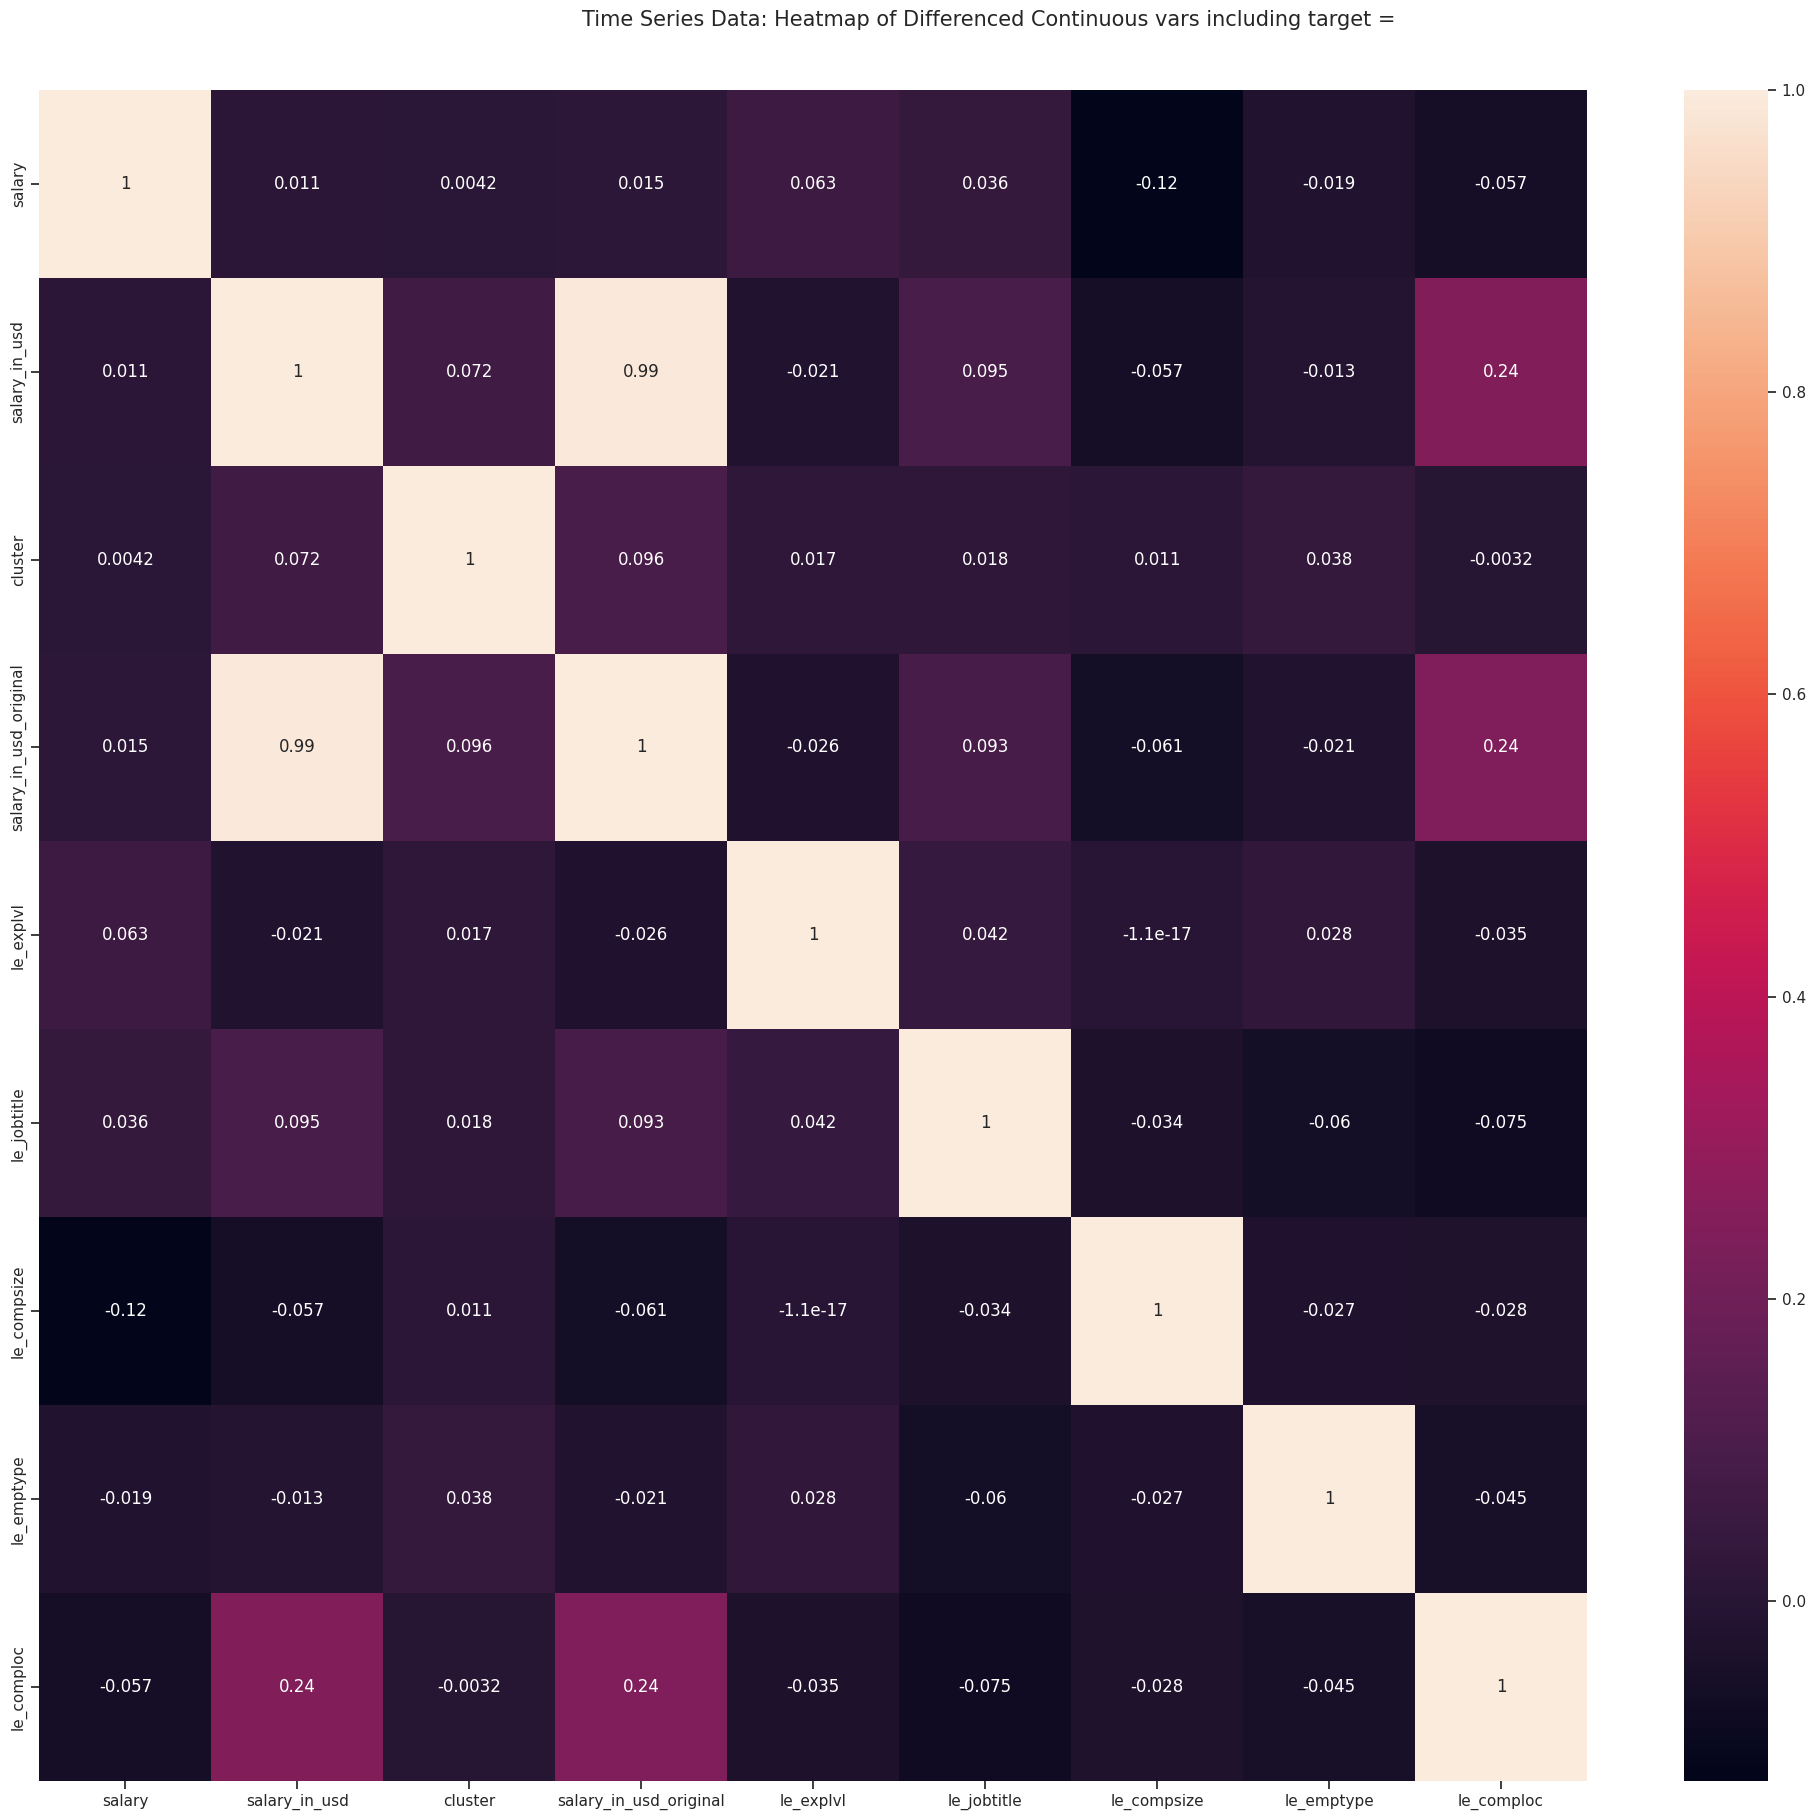

<Figure size 1500x0 with 0 Axes>

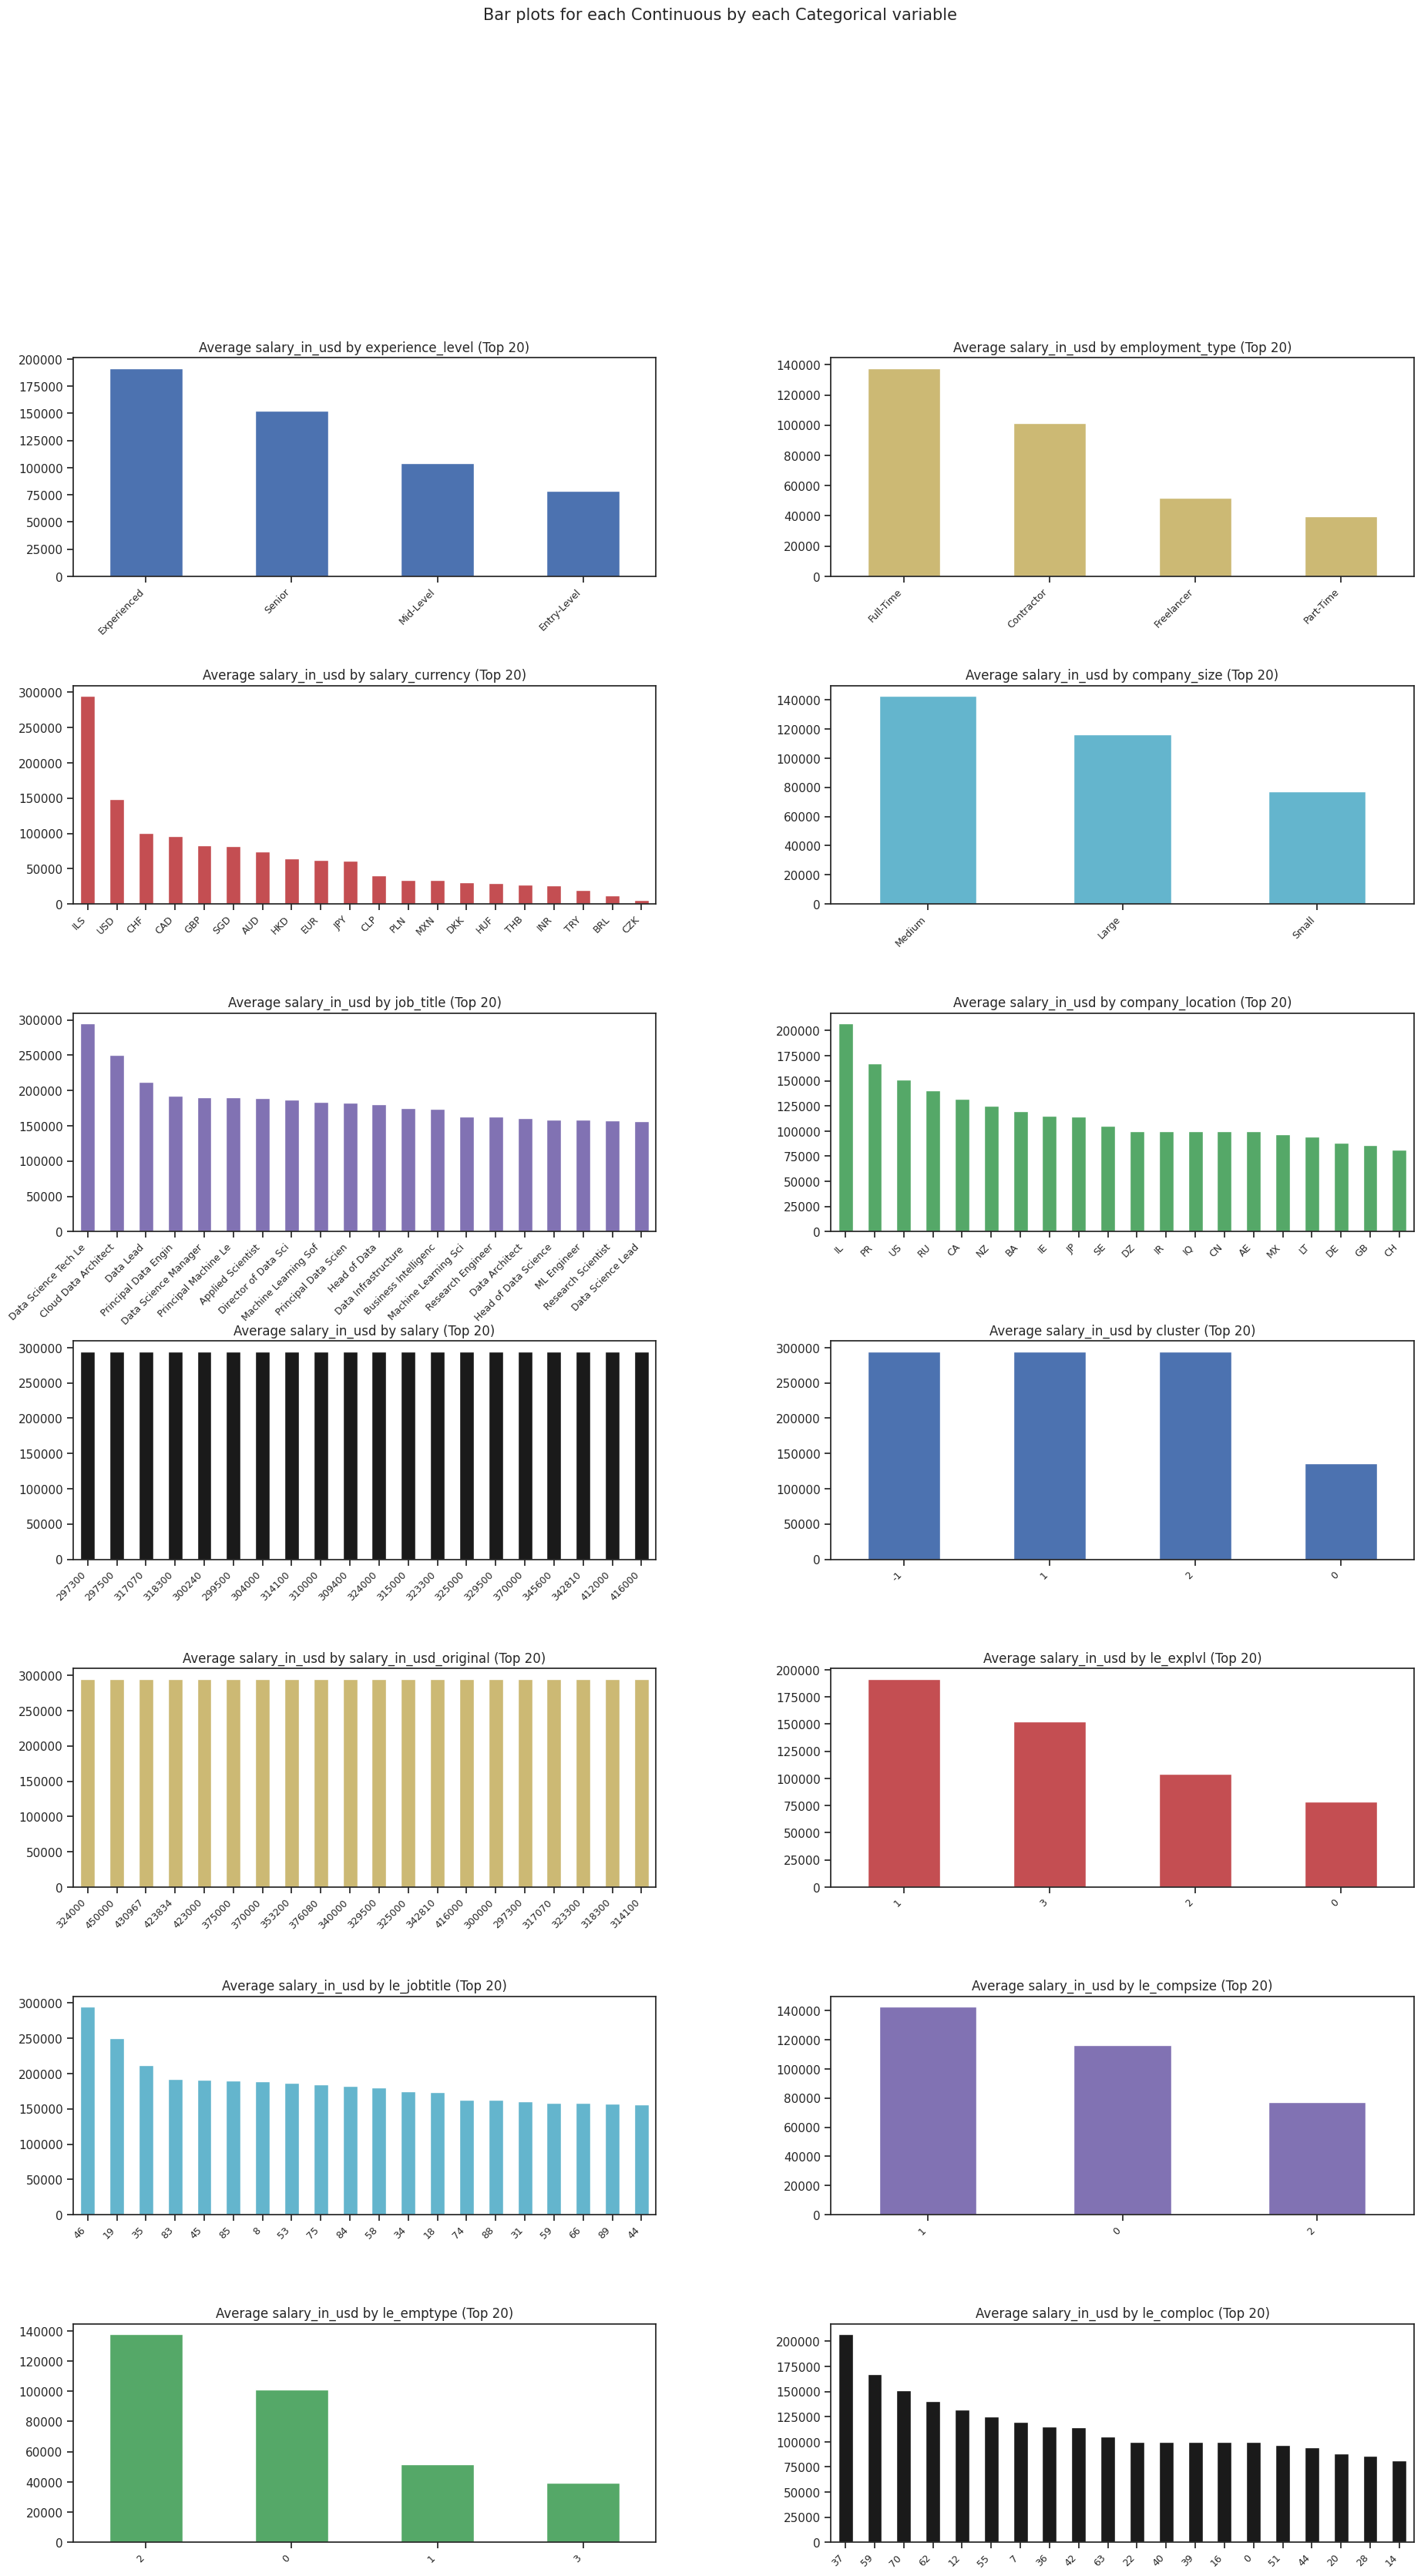

All Plots done
Time to run AutoViz = 13 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [43]:
# Import the necessary module
from autoviz.AutoViz_Class import AutoViz_Class

# Initialize AutoViz
AV = AutoViz_Class()

# Ensure inline plotting for Jupyter notebooks
%matplotlib inline

# Provide the file path to your dataset (make sure the path is correct)
filename = '/content/drive/My Drive/DS_salary.csv'

# Perform EDA using AutoViz
# Pass the filename directly, and leave other parameters as default
dfte = AV.AutoViz(df, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
                  chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30, save_plot_dir=None)

# This will display the results inline

**Count Plot for Experience Level and Employment Type etc**

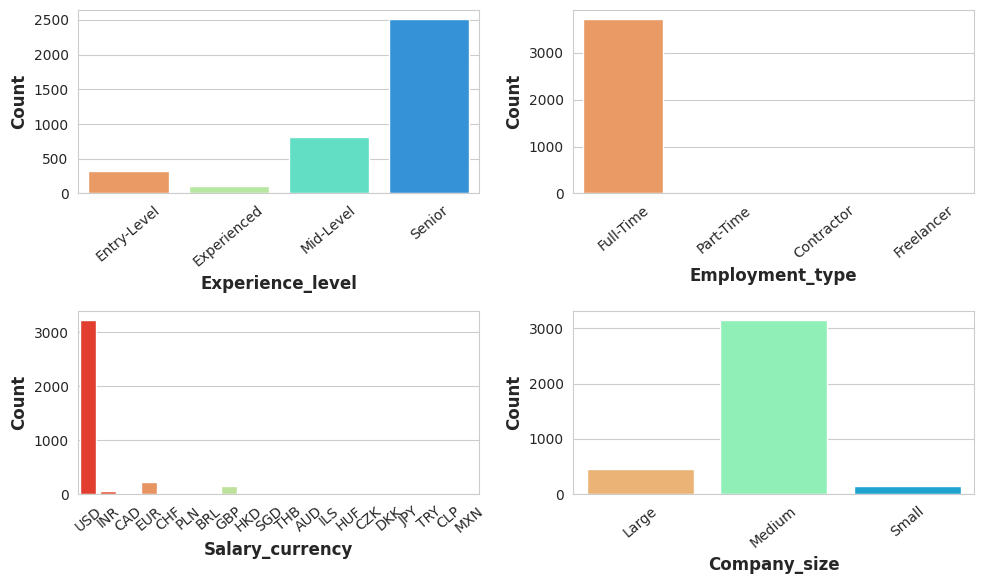

In [37]:
fig, axis = plt.subplots(2, 2, figsize=(10, 6))
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})

columns = ['experience_level', 'employment_type', 'salary_currency', 'company_size']
axis = axis.flatten()
for i, col in enumerate(columns):
    p = sns.countplot(data=df, x=df[col], ax=axis[i], palette= "rainbow_r")
    axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=40)
    axis[i].set_xlabel(col.capitalize(), fontsize=12, fontweight='bold')
    axis[i].set_ylabel('Count', fontsize=12, fontweight='bold')

# Remove any remaining empty subplots
for j in range(len(columns), len(axis)):
    fig.delaxes(axis[j])


plt.tight_layout()
plt.show()

Insights:
- Most common experience level: "Senior" (2518 counts).
- Most common employment type: "Full-Time" (3724 counts).
- Majority of salaries in USD (3229 counts).
- Most prevalent company size: "Medium" (3157 counts).

**Conclusion:**

Salary trends:

- Minimal change in 2020-2021.
- Continued fluctuations in 2021-2022.
- Similar pattern in 2022-2023.

Company size impact:

- Medium companies see salary growth.
- Large companies have stable salaries.

Experience level:

- Experienced pros earn most.
- Seniors follow, then mid-level, and entry-level.

Employment types:

- Full-Time has the highest average.
- Contractors also earn well.
- Freelancers and part-timers earn less.

Top job titles:

- Data Science Tech Lead earns the most.

Currency-based salaries:

- USD salaries are highest.
- ILS, GBP, and CHF follow.

Top locations:

- Illinois offers the highest salaries.

Company size impact:

- Medium companies pay the most.

Salary distribution:

- Right-skewed with a peak.

Entry-level job titles:

- Data Analyst, Data Scientist, Data Engineer.

Cost-effective choice:

- Experienced contractors earn 416,000 USD.

Common insights:

- "Senior" is the most common experience level.
- "Full-Time" is the most common employment type.
- Majority earn salaries in USD.
- "Medium" companies are prevalent.

In [38]:
df.to_excel("cleaned_data.xlsx", index=False)

# Converting Dataset

Determine numerical and categorical columns

In [23]:
#find out whether the column is numerical or categorical
numerical_cols = list(df._get_numeric_data().columns)
print('Numerical columns:')
print(numerical_cols)
print('')
categorical_cols = list(set(df.columns) - set(numerical_cols))
print('Categorical columns:')
print(categorical_cols)

Numerical columns:
['work_year', 'salary', 'salary_in_usd', 'cluster', 'salary_in_usd_original']

Categorical columns:
['experience_level', 'salary_currency', 'company_size', 'company_location', 'employment_type', 'job_title']


Converting categorical data into numerical data by using LabelEncoder

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
#experience_level
le = LabelEncoder()
df['le_explvl'] = le.fit_transform(df['experience_level'])
df['le_explvl'].unique()

array([0, 1, 2, 3])

In [26]:
#job_title
df['le_jobtitle'] = le.fit_transform(df['job_title'])
df['le_jobtitle'].unique()

array([ 8, 41, 22, 69, 89, 33, 25, 47, 13, 88, 17,  9,  7,  2,  1, 23, 14,
       16, 51, 58,  4, 31, 53, 59, 29, 66,  6,  5, 55, 49, 62, 37, 74, 67,
       57, 90, 45, 42, 70, 61,  3, 34, 44, 86, 28, 72, 84, 38, 18, 50, 32,
       73, 21, 40, 52, 11, 30, 12, 75, 15, 24, 10, 35, 43, 79, 68, 27, 26,
        0, 63, 60, 48, 64, 54, 81, 76, 85, 36, 46, 20, 39, 77, 87, 82, 71,
       65, 78, 80, 19, 83, 92, 56, 91])

In [27]:
#company_size
df['le_compsize'] = le.fit_transform(df['company_size'])
df['le_compsize'].unique()

array([0, 1, 2])

In [28]:
#employment_type
df['le_emptype'] = le.fit_transform(df['employment_type'])
df['le_emptype'].unique()

array([2, 3, 0, 1])

In [29]:
#company_location
df['le_comploc'] = le.fit_transform(df['company_location'])
df['le_comploc'].unique()

array([70, 53, 38, 12, 25, 29, 20, 14,  6, 63, 10, 28, 71,  7, 30, 31, 54,
       26, 36, 64, 65, 51, 27, 33,  2, 43, 61, 67, 13, 69, 37, 17, 60, 23,
       46, 49, 57, 41, 47,  3, 18, 40, 34,  4,  8,  5, 35, 45, 52, 19, 22,
       62, 58, 44, 68,  9, 24,  1, 66, 59,  0, 21, 39, 16, 11, 42, 15, 48,
       50, 56, 32, 55])

# Splitting Dataset

In [30]:
#removed 'salary_currecy' and 'salary' as already converted into 'salary_in_usd'
#removed 'experience_level', 'job_title'
data_df = df
y = data_df['salary_in_usd']
x = data_df.drop(['salary_in_usd', 'salary', 'salary_currency', 'experience_level', 'job_title', 'company_size', 'employment_type', 'company_location'], axis = 1)

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Feature Engineering

In [33]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression

In [34]:
# Feature Engineering: Dimensionality Reduction and Selection
feature_selection = True  # Set to True to apply feature selection
pca_reduction = True  # Set to True to apply PCA

if feature_selection:
    selector = SelectKBest(score_func=f_regression, k=min(10, x_train.shape[1]))
    x_train = selector.fit_transform(x_train, y_train)
    x_test = selector.transform(x_test)

if pca_reduction:
    pca = PCA(n_components=min(10, x_train.shape[1]))
    x_train = pca.fit_transform(x_train)
    x_test = pca.transform(x_test)

# Standard Approach Model Training with cross-validation

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [36]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor()
}

In [53]:
#install this version because XGBoost does not support scikit-learn > 1.6.0
!pip install scikit-learn==1.4.0

In [54]:
!pip install xgboost --upgrade

In [55]:
!pip show xgboost

Name: xgboost
Version: 2.1.3
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, nvidia-nccl-cu12, scipy
Required-by: TPOT


In [56]:
results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    results[name] = {
        "CV RMSE": np.sqrt(-cv_scores.mean()),
        "CV StdDev": np.sqrt(cv_scores.std())
    }
    model.fit(x_train, y_train)

# for name, model in models.items():
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     r2 = r2_score(y_test, y_pred)
#     results[name] = {"RMSE": rmse, "R2": r2}

results_df = pd.DataFrame(results).T
print("Cross-Validation Results:")
print(results_df)

Cross-Validation Results:
                       CV RMSE    CV StdDev
Linear Regression  7049.840052  3584.295281
Decision Tree       391.588078   213.864128
Random Forest       205.402289   103.674158
Gradient Boosting   474.038892   172.043523
XGBoost             768.876796   362.685633


# Model Evaluation

In [57]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [58]:
metrics = []

for name, model in models.items():
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    metrics.append({"Model": name, "MSE": mse, "MAE": mae,"RMSE": rmse, "R2": r2})

metrics_df = pd.DataFrame(metrics)
print("Evaluation Metrics:")
print(metrics_df)

Evaluation Metrics:
               Model           MSE          MAE         RMSE        R2
0  Linear Regression  4.894170e+07  2370.795976  6995.834228  0.986871
1      Decision Tree  1.028478e+05    87.846767   320.698906  0.999972
2      Random Forest  2.620760e+04    68.352427   161.887623  0.999993
3  Gradient Boosting  1.983808e+05   280.748789   445.399591  0.999947
4            XGBoost  5.661265e+05   341.756192   752.413771  0.999848


In [59]:
# Sort the models based on your preferred metric, e.g., RMSE or R²
best_model_by_mse = metrics_df.sort_values('MSE').iloc[0]
best_model_by_mae = metrics_df.sort_values('MAE').iloc[0]
best_model_by_rmse = metrics_df.sort_values('RMSE').iloc[0]
best_model_by_r2 = metrics_df.sort_values('R2', ascending=False).iloc[0]

print(f"Best model by MSE: {best_model_by_rmse['Model']}")
print(f"Best model by MAE: {best_model_by_rmse['Model']}")
print(f"Best model by RMSE: {best_model_by_rmse['Model']}")
print(f"Best model by R2: {best_model_by_r2['Model']}")

Best model by MSE: Random Forest
Best model by MAE: Random Forest
Best model by RMSE: Random Forest
Best model by R2: Random Forest


# AutoML Model Training

TPOT

In [60]:
!pip install tpot

  Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0


In [61]:
!pip install --upgrade scikit-learn --force-reinstall

  Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached numpy-2.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached numpy-2.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
Using cached scipy-1.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (40.6 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.5.0
    Uninstalling threadpoolctl-3.5.0:
      Successfully uni

In [37]:
from tpot import TPOTRegressor

model = TPOTRegressor(verbosity=2, generations=5, population_size=20)
model.fit(x_train, y_train)

print(f"Best Model: {model.fitted_pipeline_}")

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -204868.87475080966

Generation 2 - Current best internal CV score: -56147.51362981591

Generation 3 - Current best internal CV score: -35355.599283554984

Generation 4 - Current best internal CV score: -35355.599283554984

Generation 5 - Current best internal CV score: -35355.59928355498

Best pipeline: KNeighborsRegressor(VarianceThreshold(input_matrix, threshold=0.1), n_neighbors=1, p=1, weights=distance)
Best Model: Pipeline(steps=[('variancethreshold', VarianceThreshold(threshold=0.1)),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=1, p=1, weights='distance'))])


# Model Interpretation

Feature Importance

Random Forest Feature Importance:
                  Feature  Importance
0               work_year    0.999976
3               le_explvl    0.000010
2  salary_in_usd_original    0.000003
6              le_emptype    0.000002
1                 cluster    0.000002
7              le_comploc    0.000002
5             le_compsize    0.000002
4             le_jobtitle    0.000002


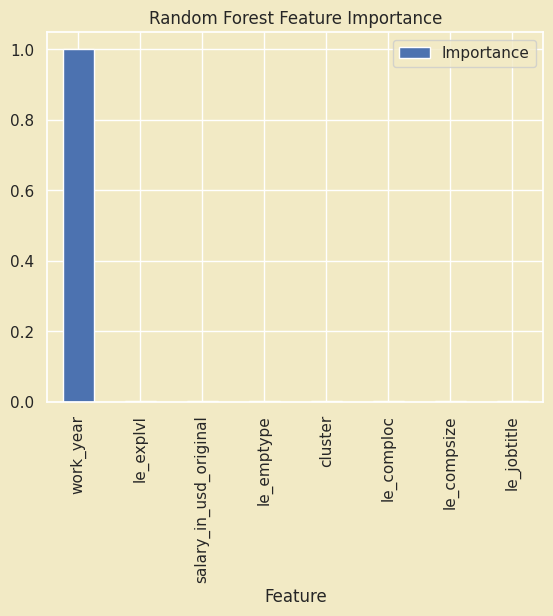

In [63]:
if "Random Forest" in models:
    rf_model = models["Random Forest"]
    importances = rf_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        "Feature": x.columns[:len(importances)],
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    print("Random Forest Feature Importance:")
    print(feature_importance_df)
    feature_importance_df.set_index("Feature").plot(kind="bar")
    plt.title("Random Forest Feature Importance")
    plt.show()

Decision Tree Feature Importance:
                  Feature    Importance
0               work_year  9.999925e-01
2  salary_in_usd_original  3.957214e-06
5             le_compsize  8.460943e-07
1                 cluster  5.762551e-07
3               le_explvl  5.559480e-07
6              le_emptype  5.321214e-07
7              le_comploc  5.275529e-07
4             le_jobtitle  5.252755e-07


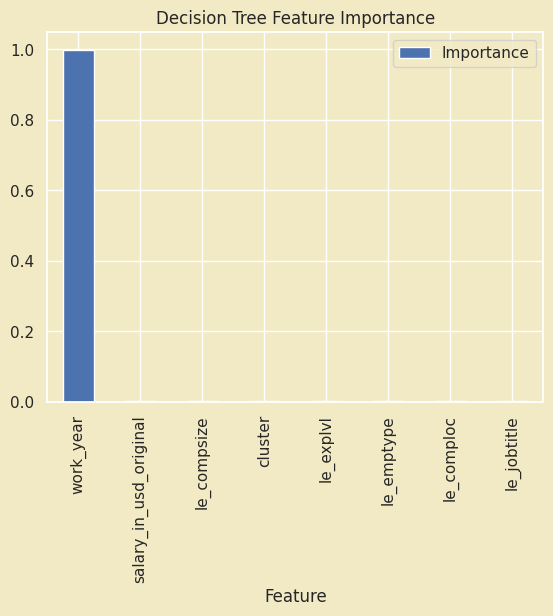

In [64]:
if "Decision Tree" in models:
    dt_model = models["Decision Tree"]
    importances = dt_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        "Feature": x.columns[:len(importances)],
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    print("Decision Tree Feature Importance:")
    print(feature_importance_df)
    feature_importance_df.set_index("Feature").plot(kind="bar")
    plt.title("Decision Tree Feature Importance")
    plt.show()

SHAP Interpretability

In [66]:
!pip install shap

  Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.1
    Uninstalling numpy-2.2.1:
      Successfully uninstalled numpy-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.0.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.1 which is incompatible.
langchain 0.3.14 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.0.2 which is incompatible.
pytensor 2.26.4 requires numpy<2,>=1.17.0, but you have numpy 2.0.2 which is incompa

In [67]:
!pip show numpy

Name: numpy
Version: 2.0.2
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
            * Redistributions of source code must retain the above copyright
               notice, this list of conditions and the following disclaimer.
        
            * Redistributions in binary form must reproduce the above
               copyright notice, this list of conditions and the following
               disclaimer in the documentation and/or other materials provided
               with the distribution.
        
            * Neither the name of the NumPy Developers nor the names of any
               contributors may be used to endorse or promot

ExactExplainer explainer: 1130it [01:21, 12.35it/s]                          


SHAP Summary Plot:


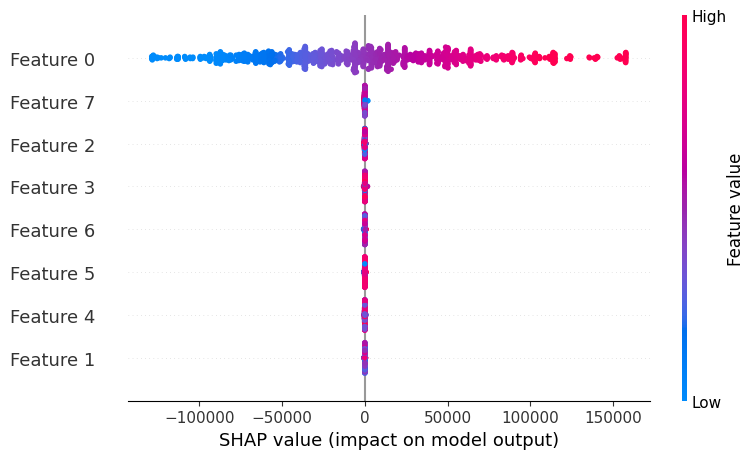

In [40]:
import shap
if "XGBoost" in models:
    xgb_model = models["XGBoost"]
    xgb_model.fit(x_train, y_train)
    explainer = shap.Explainer(xgb_model.predict, x_test)
    shap_values = explainer(x_test)

    print("SHAP Summary Plot:")
    shap.summary_plot(shap_values, x_test)
    plt.show()